## Лабораторная работа № 2
## Бабичева Анна М8О-304Б-17
## Вариант № 2

Импортирую необходимые библиотеки. Модуль matrix содержит в себе наработки из 1 лабораторной работы.

In [1]:
import numpy as np
import pandas as pd
import math
import pylab
import matplotlib.pyplot as plt
import random
import matrix

from numpy import arange
from numpy import meshgrid
from matplotlib import mlab
from sys import stdin
from copy import deepcopy

# ЧАСТЬ 1 
### 2.1. Реализовать методы простой итерации и Ньютона решения нелинейных уравнений в виде программ, задавая в качестве входных данных точность вычислений. С использованием разработанного программного обеспечения найти положительный корень нелинейного уравнения (начальное приближение определить графически). Проанализировать зависимость погрешности вычислений от количества итераций. 

$\ln(x+2)-x^2=0$

$f(x)=\ln{(x+2)}-x^2$

In [2]:
def f(x):
    if x <= -2:
        raise Exception("x = {} вне области определения".format(x))
    return math.log(x + 2) - x * x

Для начала построю график функции.

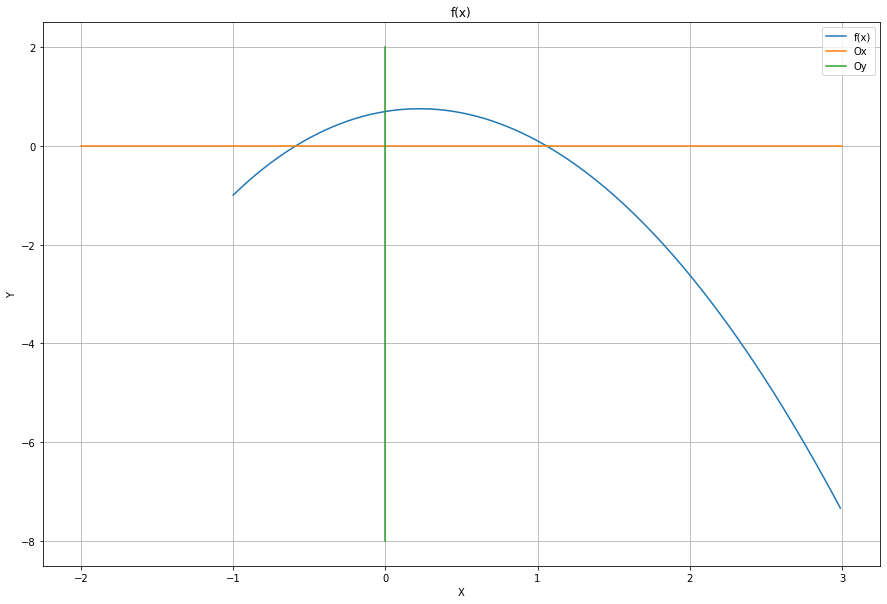

In [3]:
# ГРАФИК ФУНКЦИИ
xmin = -1.95
xmin = -1
xmax = 3
dx = 0.01

xarr = np.arange(xmin, xmax, dx)
ylist = [f(x) for x in xarr]

fig = plt.figure(figsize=(15, 10))
grid = plt.grid(True) 

plt.title('f(x)')
plt.plot(xarr, ylist)
plt.plot([-2, 3], [0, 0])
plt.plot([0, 0], [-8, 2])
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['f(x)', 'Ox', 'Oy'])
plt.show()

Из построения видно, что корень уравнения находится между 1 и 1.25.

Одним из способов решения нелинейных уравнений является графический способ, когда мы выделяем в уранении два слагаемых и переносим одно из них в правую часть $f_1(x)=f_2(x)$. Остается построить обе функции и найти точку их пересечения.

Выделю две вспомогательные функции:



$f_1(x)=\ln(x+2)$

$f_2(x)=x^2$

In [4]:
def f1(x):
    if x <= -2:
        raise Exception("x вне области определения")
    return math.log(x + 2)

def f2(x):
    return x * x

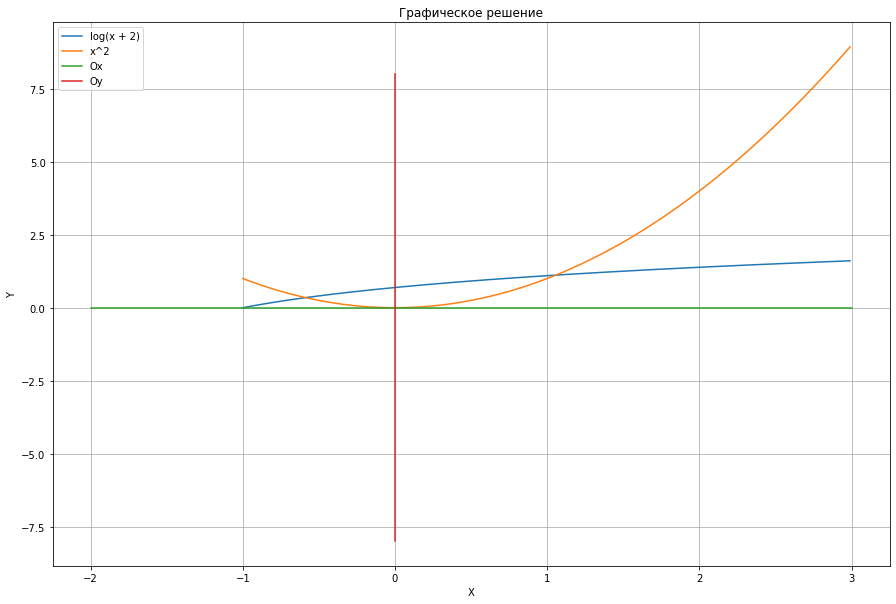

In [5]:
# ГРАФИЧЕСКОЕ РЕШЕНИЕ
xarr = np.arange(xmin, xmax, dx)
ylist1 = [f1(x) for x in xarr]
ylist2 = [f2(x) for x in xarr]

fig = plt.figure(figsize=(15, 10))
grid = plt.grid(True) 

plt.title('Графическое решение')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xarr, ylist1)
plt.plot(xarr, ylist2)
plt.plot([-2, 3], [0, 0])
plt.plot([0, 0], [-8, 8])
plt.legend(['log(x + 2)', 'x^2', 'Ox', 'Oy'])
plt.show()

Графическое решение показывает тот же результат.

Методы Ньютона и касательных позволяют итерационно найти приближенное значение корня уравнения. Для таких методов необходимо задание начального значения $x_0$.

Сходимость метода Ньютона определяются следующими условиями: пусть на отрезке $[a, b]$ функция $f(x)$ первую и вторую производные постоянного знака $f(a)f(b)<0$, тогда начатая с точки $x_0$ из отрезка $[a, b]$ ($f(x_0)f''(x_0)>0$) последовательность, определяемая методом Ньютона, монотонно сходится к корню $x^*$ из интервала $(a, b)$.

Сам итерационный процесс метода Ньютона имеет вид: 
\begin{equation}
    x^{(k+1)}=x^{(k)}-\frac{f(x^{(k)})}{f'(x^{(k)})}
\end{equation}

Таким образом, для метода Ньютона нам необходимы первая и вторая производные функции.

$f'(x)=-2x+\frac{1}{x+2}$

In [6]:
def df(x):
    if x == -2:
        raise Exception("x = {} вне области определения".format(x))
    return -2 * x + 1 / (x + 2)

$f''(x)=-2-\frac{1}{(x+2)^2}$

In [7]:
def ddf(x):
    if x == -2:
        raise Exception("x = {} вне области определения".format(x))
    return -2 - 1 / ((x + 2) * (x + 2))

Критерием остановы будет $|x^{(k)}-x^{(k-1)}|<\epsilon$

Буду искать корень уравнения на отрезке $[0, 2]$, не задавая начальное приближение, $\epsilon=0.001$

In [8]:
def Newton(eps=0.001, a=0, b=2, x0=None, f=f, df=df, ddf=ddf):
    if f(a) * f(b) >= 0:
        raise Exception("Не выполнено необходимое условие: задайте другой отрезок")
    #x = x0
    if x0 == None:
        if f(a) * ddf(a) > 0:
            x0 = a
        else:
            x0 = b
    else:
        if (x0 > b) | (x0 < a):
            raise Exception("Первое приближение должно быть внутри отрезка")            
    x = x0 - f(x0) / df(x0)
    e = abs(x - x0)
    x0 = x
    k = 1
    while e > eps:
        x = x0 - f(x0) / df(x0)
        e = abs(x - x0)
        x0 = x
        k += 1
    return x, k

При использовании метода простой итерации необходимо исходное уравнение привести к эквивалентному виду $x=\phi(x)$.

Однако, накладываются сильные условия: 

1) $\phi(x)$ должна быть определена и дифференцируема на отрезке $[a, b]$

2) $\phi(x) \in [a, b]  \forall x \in [a, b]$

3) $\exists q:|\phi'(x)|\leq q<1  \forall x \in (a, b)$

При выполнении этих условий метод сходится по итерационной формуле:
\begin{equation}
    x^{(k+1)}=\phi(x^{(k)})
\end{equation}

$\phi(x)=\surd{\ln(x+2)}$

In [9]:
def phi_1(x):
    if x <= -2:
        raise Exception("x = {} вне области определения".format(x))
    return math.sqrt(math.log(x + 2))

$\phi'(x)=\frac{1}{2(x+2)\surd{\ln(x+2)}}$

In [10]:
def dphi_1(x):
    if (x <= -2) | (math.log(x + 2) == 0):
        raise Exception("x = {} вне области определения".format(x))
    return 1 / (2 * math.sqrt(math.log(x + 2)) * (x + 2))

Критерием остановы будет $\frac{q}{1-q}|x^{(k)}-x^{(k-1)}|<\epsilon$

Буду искать корень на том же отрезке, не задавая начальное приближение. $q$ буду искать методом дихотомии.

In [11]:
def Simple_iterations(eps=0.001, a=0, b=2, x0=None, f=phi_1, df=dphi_1):
    x = a
    while x <= b:
        if (f(x) < a) | (f(x) > b):
            raise Exception("Не выполнено необходимое условие: задайте другую эквивалентную функцию (f(x) = {})".format(f(x)))
        x += eps
    q = 0.5
    k = 0
    while True:
        x = a + eps
        flag = True
        while x < b:
            if abs(df(x)) <= q:
                x += eps
            else:
                flag = False
                break
        if k == 10000:
            raise Exception("Не выполнено необходимое условие: задайте другую эквивалентную функцию (k = {})".format(k))
        elif flag == True:
            break
        else:
            q = (1 + q) / 2
            k += 1
    if x0 == None:
        x0 = random.uniform(a, b)
    else:
        if (x0 > b) | (x0 < a):
            raise Exception("Первое приближение должно быть внутри отрезка")    
    x = f(x0)
    e = (q / (1 - q)) * abs(x - x0)
    x0 = x
    k = 1
    while e > eps:
        x = f(x0)
        e = (q / (1 - q)) * abs(x - x0)
        x0 = x
        k += 1
    return x, k, q  

Решение методом Ньютона:

In [12]:
x, k = Newton()
print("Answer of Newton method: {0}\nIterations: {1}".format(x, k))

Answer of Newton method: 1.0571036600553385
Iterations: 4


Решение методом простой итерации:

In [13]:
x, k, q = Simple_iterations()
print("Answer of Simple Iterations method: {0}\nIterations: {1}\nq = {2}".format(x, k, q))

Answer of Simple Iterations method: 1.057171531425971
Iterations: 4
q = 0.5


Точное решение графически:

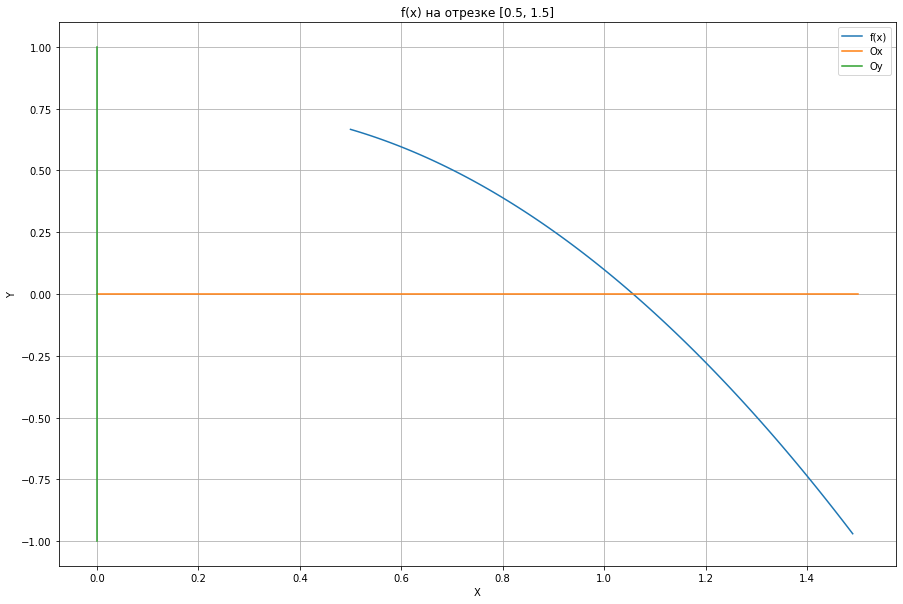

In [14]:
xmin = 0.5
xmax = 1.5
dx = 0.01

xarr = np.arange(xmin, xmax, dx)
ylist = [f(x) for x in xarr]

fig = plt.figure(figsize=(15, 10))
grid = plt.grid(True) 

plt.title('f(x) на отрезке [0.5, 1.5]')
plt.plot(xarr, ylist)
plt.plot([0, 1.5], [0, 0])
plt.plot([0, 0], [-1, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['f(x)', 'Ox', 'Oy'])
plt.show()

# ЧАСТЬ 2
### 2.2. Реализовать методы простой итерации и Ньютона решения систем нелинейных уравнений в виде программного кода, задавая в качестве входных данных точность вычислений. С использованием разработанного программного обеспечения решить систему нелинейных уравнений (при наличии нескольких решений найти то из них, в котором значения неизвестных являются положительными); начальное приближение определить графически. Проанализировать зависимость погрешности вычислений от количества итераций. 

\begin{cases}
   (x_1^2+9)x_2-27=0
   \\
   (x_1-1.5)^2+(x_2-1.5)^2-9=0
 \end{cases}

$f_1(x_1, x_2)=(x_1^2+9)x_2-27$

In [15]:
def f1(x1, x2):
    return (x1 * x1 + 9) * x2 * x2 - 27

$f_2(x_1, x_2)=(x_1-1.5)^2+(x_2-1.5)^2-9$

In [16]:
def f2(x1, x2):
    return (x1 - 1.5) * (x1 - 1.5) + (x2 - 1.5) * (x2 - 1.5) - 9

Построю графики функций.

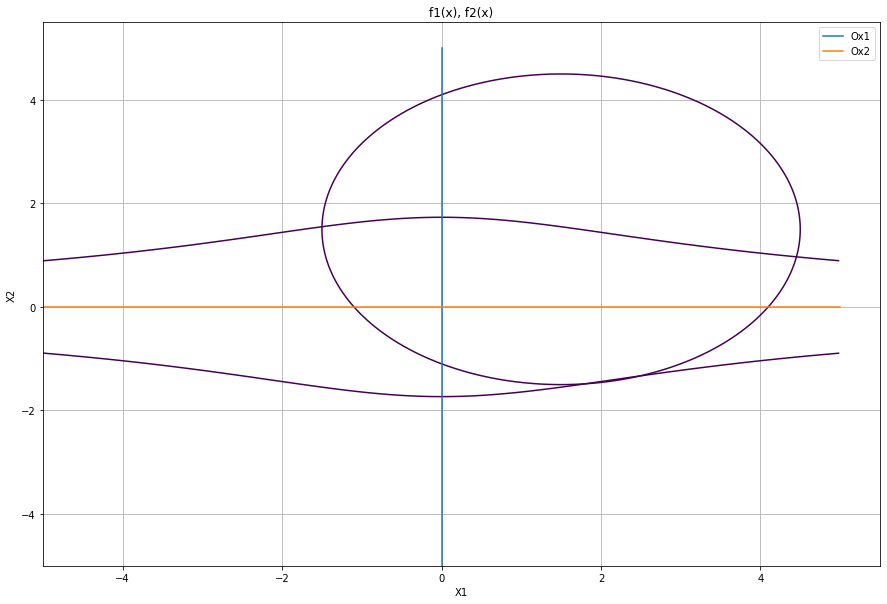

In [17]:
# ГРАФИК ФУНКЦИИЙ
xmin = -5
xmax = 5
dx = 0.01

xrange = arange(xmin, xmax, dx)
yrange = arange(xmin, xmax, dx)
X, Y = meshgrid(xrange, yrange)
F1 = f1(X, Y) 
F2 = f2(X, Y) 

fig = plt.figure(figsize=(15, 10))
grid = plt.grid(True) 

plt.title('f1(x), f2(x)')

plt.contour(X, Y, F1, [0])
plt.contour(X, Y, F2, [0])

plt.plot([0, 0], [5, -5])
plt.plot([5, -5], [0, 0])
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(['Ox1', 'Ox2']) 
plt.show()

Из построения видно, что решение системы для положительных аргументов $x_1 \in [4, 4.5], x_2 \in [0, 2]$

Итерационная формула для метода Ньютона при заданном начальном приближении $x_0=(x_1^0, x_2^0)$ имеет вид:

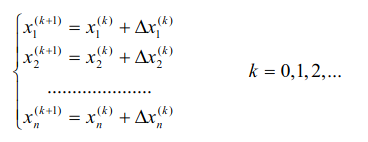

где $\Delta x_i^{(k)}$ определяются из решения системы линейных алгебраических уравнений:

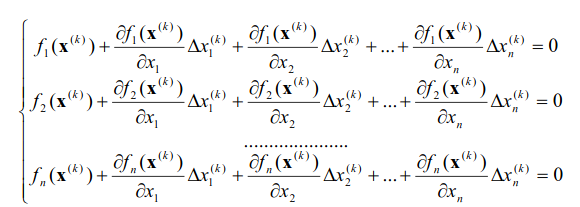

В векторно-матричной форме:

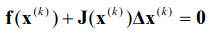

где 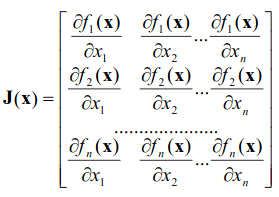

$\frac{df_1}{dx_1}=2x_2^2x_1$

In [18]:
def df1_dx1(x1, x2):
    return 2 * x2 * x2 * x1

$\frac{df_1}{dx_2}=2x_2(x_1^2+9)$

In [19]:
def df1_dx2(x1, x2):
    return 2 * x2 * (x1 * x1 + 9)

$\frac{df_2}{dx_1}=2(x_1-1.5)$

In [20]:
def df2_dx1(x1, x2):
    return 2 * (x1 - 1.5)

$\frac{df_2}{dx_2}=2(x_2-1.5)$

In [21]:
def df2_dx2(x1, x2):
    return 2 * (x2 - 1.5)

Данную систему целесообразно решать методом Гаусса с использованием LU-разложения.

Тогда итерационная формула в векторно-матричном виде:

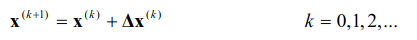

Критерием остановы будет $||x^{(k)}-x^{(k-1)}||\leq\epsilon$

Норма: $||*||=max|x_i|$

In [22]:
def norm(x):
    m = 0
    for i in range(len(x)):
        if abs(x[i]) > m:
            m = abs(x[i])
    return m

In [23]:
def Newton_syst(eps=0.001, a=-5, b=5, x0=[4, 2], F=[f1, f2], J=[[df1_dx1, df1_dx2], [df2_dx1, df2_dx2]]):
    if len(F) != len(J):
        raise Exception("Несоответствие размерностей F и J: {0}, {1}".format(len(F), len(J)))
    if (x0 != None):
        if len(x0) != len(F):
            raise Exception("Несоответствие размерностей F и x0: {0}, {1}".format(len(F), len(x0)))
    else:
        x0 = [random.uniform(a, b)] * len(F)
    k = 0
    while True:
        k += 1
        Fk = []
        Jk = []

        for f in F:
            Fk.append(-f(x0[0], x0[1]))
        for row in J:
            rows = []
            for col in row:
                rows.append(col(x0[0], x0[1]))
            Jk.append(rows)
            
        delta = matrix.Gauss_LU(matrix.Matrix(Jk, LU=True), Fk)
        
        for i in range(len(x0)):
            x0[i] += delta[i]
        if norm(delta) < eps:
            break
    return k, x0

При использовании метода простой итерации система приводится к эквивалентному виду: 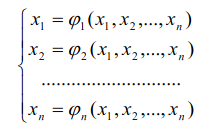

Чтобы метод сходился, на $\phi_i(x)$ накладываются следующие условия:

1) $\phi_i(x)$ непрерывна вместе со своей производной в ограниченной выпуклой области G 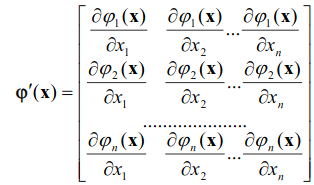


2) 

Норма $||*||=max|x_{ij}|$

In [24]:
def norm_2(x):
    m = 0
    for row in x:
        for col in row:
            if abs(col) > m:
                m = abs(col)
    return m

Подходящие эквивалентные функции были найдены с помощью универсального метода.

$\phi_1(x_1, x_2)=x_1-\frac{1}{109}(25x_1^2-75x_1+25x_2^2-75x_2-x_2x_1^2-9x_2-85.5)$

In [25]:
def phi1(x1, x2):
    return x1 - (1 / 109) * (25 * x1 ** 2 - 75 * x1 + 25 * x2 ** 2 - 75 * x2 - x2 * x1 ** 2 - 9 * x2 - 85.5)

$\phi_2(x_1, x_2)=x_1-\frac{1}{109}(-16x_1^2+48x_1-16x_2^2+48x_2+5x_2x_1^2+45x_2-63)$

In [26]:
def phi2(x1, x2):
    return x2 - (1 / 109) * (-16 * x1 ** 2 + 48 * x1 - 16 * x2 ** 2 + 48 * x2 + 5 * x2 * x1 ** 2 + 45 * x2 - 63)

$\frac{d\phi_1(x_1, x_2)}{dx_1}=1-\frac{1}{109}(50x_1-75-2x_1x_2)$

In [27]:
def dphi1_dx1(x1, x2):
    return 1 - (1 / 109) * (50 * x1 - 75 - 2 * x1 * x2)

$\frac{d\phi_1(x_1, x_2)}{dx_2}=-\frac{1}{109}(50x_2-x_1^2-84)$

In [28]:
def dphi1_dx2(x1, x2):
    return - (1 / 109) * (50 * x2 - x1 ** 2 - 84)

$\frac{d\phi_2(x_1, x_2)}{dx_1}=-\frac{1}{109}(-32x_1+48-75+10x_1x_2)$

In [29]:
def dphi2_dx1(x1, x2):
    return - (1 / 109) * (-32 * x1 + 48 + 10 * x1 * x2)

$\frac{d\phi_2(x_1, x_2)}{dx_2}=1-\frac{1}{109}(-32x_2+5x_1^2+93)$

In [30]:
def dphi2_dx2(x1, x2):
    return 1 - (1 / 109) * (-32 * x2 + 5 * x1 ** 2 + 93)

Итерационная формула: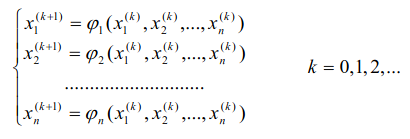

Критерием остановы будет $\frac{q}{1-q}|x^{(k)}-x^{(k-1)}|<\epsilon$

Буду искать решение в области первой четверти от 0 до 5, начальное приближение $x_0=(4, 2)$. $q$ также ищу методом дихотомии.

In [31]:
def Simple_syst(eps=0.001, a=0, b=5, x0=[4, 2], F=[phi1, phi2], J=[[dphi1_dx1, dphi1_dx2], [dphi2_dx1, dphi2_dx2]]):
    if len(F) != len(J):
        raise Exception("Несоответствие размерностей F и J: {0}, {1}".format(len(F), len(J)))
    if (x0 != None):
        if len(x0) != len(F):
            raise Exception("Несоответствие размерностей F и x0: {0}, {1}".format(len(F), len(x0)))
        if (x0[0] > b) | (x0[0] < a) | (x0[1] > b) | (x0[1] < a):
            raise Exception("Первое приближение должно быть внутри области")
    else:
        x0 = [random.uniform(a, b)] * len(F)
    
    xrange = arange(a, b, eps)
    q = 0.5
    k = 0
    while True:
        m = 0
        Ph = []
        
        for i in range(xrange.size):
            for j in range(xrange.size):
                for row in Ph:
                    rows = []
                    for col in row:
                        rows.append(col(xrange[i], xrange[j]))
                    Ph.append(rows)
                if norm_2(Ph) > m:
                    m = norm_2(Ph)
                
        if m <= q:
            break
        elif k == 10000:
            raise Exception("Не выполнено достаточное условие: задайте другие эквивалентные функции (k = {})".format(k))
        else:
            q = (1 + q) / 2
            k += 1
    
    k = 0
    xk = deepcopy(x0)
    delta = deepcopy(x0)
    while True:
        for i in range(len(F)):
            xk[i] = F[i](x0[0], x0[1])
            delta[i] -= xk[i]
            if (xk[i] > b) | (xk[i] < a):
                raise Exception("Не выполнено достаточное условие: задайте другие эквивалентные функции. x = {}".format(xk))
        if (q * norm(delta)) / (1 - q) < eps:
            break
        else:
            x0 = deepcopy(xk)
            delta = deepcopy(xk)
            k += 1
    return k, q, xk  

Решение методом Ньютона:

In [32]:
k, x = Newton_syst()
print("Answer of Newton method: {0}\nIterations: {1}".format(x, k))

Answer of Newton method: [4.452423945376682, 0.9678413288263374]
Iterations: 4


Решение методом простой итерации:

In [33]:
k, q, x = Simple_syst()
print("Answer of Simple Iterations method: {0}\nIterations: {1}\nq = {2}".format(x, k, q))

Answer of Simple Iterations method: [4.447329433034596, 0.9378510426046092]
Iterations: 58
q = 0.5


Точное решение графически:

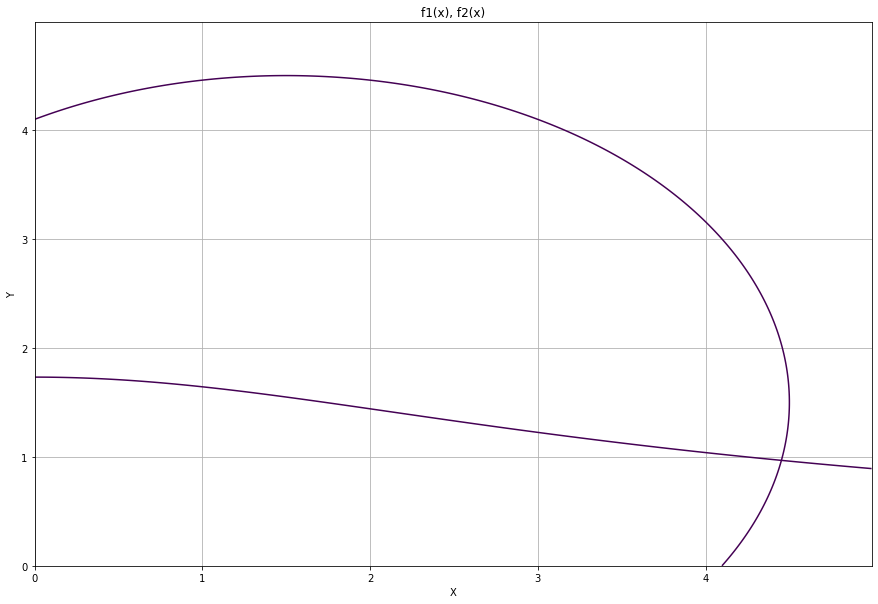

In [34]:
xmin = 0
xmax = 5
dx = 0.01

xrange = arange(xmin, xmax, dx)
yrange = arange(xmin, xmax, dx)
X, Y = meshgrid(xrange, yrange)
F1 = f1(X, Y) 
F2 = f2(X, Y) 

fig = plt.figure(figsize=(15, 10))
grid = plt.grid(True) 

plt.title('f1(x), f2(x)')

plt.contour(X, Y, F1, [0])
plt.contour(X, Y, F2, [0])

plt.xlabel('X')
plt.ylabel('Y')
plt.show()